In [1]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet201
from keras.applications.resnet import ResNet50
import numpy as np


Using TensorFlow backend.


In [2]:
def crop_img(img, scale=1.0):
    center_x, center_y = img.shape[1] / 2, img.shape[0] / 2
    width_scaled, height_scaled = img.shape[1] * scale, img.shape[0] * scale
    left_x, right_x = center_x - width_scaled / 2, center_x + width_scaled / 2
    top_y, bottom_y = center_y - height_scaled / 2, center_y + height_scaled / 2
    img_cropped = img[int(top_y):int(bottom_y), int(left_x):int(right_x)]
    return img_cropped


In [3]:
def extract_face(filename, required_size=(221, 221)):
    im = Image.open(filename)
    im.save(filename)
    pixels1 = pyplot.imread(filename)
    pixels2 = crop_img(pixels1,0.9)
    detector = MTCNN()
    results1 =  detector.detect_faces(pixels1)
    results2 = detector.detect_faces(pixels2)
    if(len(results1)!=0):
        x1, y1, width, height = results1[0]['box']
        x2, y2 = x1+width, y1+width
        face = pixels1[y1:y2, x1:x2]
    elif(len(results2)!=0):
        x1, y1, width, height = results2[0]['box']
        x2, y2 = x1+width, y1+width
        face = pixels2[y1:y2, x1:x2]
    else:
        face = pixels2
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [46]:
x = extract_face('SET5-1.jpg')
np.shape(x)

(221, 221, 3)

In [4]:
filenames_train = ['SET1-1.jpg', 'SET1-2.jpg',
                   'SET2-1.jpg','SET2-2.jpg',
                   'SET3-1.jpg',
                   'SET4-1.jpg',
                   'SET5-1.jpg',
                   'SET6-1.jpg','SET6-2.jpg','SET6-3.jpg',
                   'SET7-1.jpg', 'SET7-2.jpg',
                   'SET8-1.jpg','SET8-2.jpg']
filenames_test = ['SET1-3.jpg','SET2-3.jpg','SET3-1.jpg','SET3-2.jpg','SET3-3.jpg'
                 'SET4-1.jpg','SET4-2.jpg','SET5-2.jpg','SET6-4.jpg','SET6-5.jpg',
                 'SET7-3.jpg','SET8-3.jpg','SET8-4.jpg']


In [5]:
def get_embeddings(filenames):
	faces = [extract_face(f) for f in filenames]
	samples = asarray(faces, 'float32')
	samples = preprocess_input(samples, version=2)
	model = VGGFace(model = 'resnet50',include_top=False, input_shape=(221, 221, 3), pooling='avg')
	yhat = model.predict(samples)
	return yhat

    

In [1]:
#embeddings = get_embeddings(filenames_train)
#np.shape(embeddings)


In [201]:
def compare_image(image,embedding,database) :
    scores = []
    scores_sorted = []
    temp = get_embeddings(image)
    for i in range (14) :
        score = cosine(temp,embedding[i][:2048])
        scores.append(score) 
        scores_sorted.append(score)
    scores_sorted.sort()
    min = scores_sorted[0]
    min2 = scores_sorted[1]
    min3 = scores_sorted[2]
    for i in range (14) :
        if(scores[i]==min) :
            min_index = i
    for j in range(14) :
        if(scores[j]==min2) :
            min2_index = j
    for k in range(14) :
        if(scores[k]==min3) :
            min3_index = k
    print('Closest Match is ' + database[min_index])
    print('Second Closest Match is ' + database[min2_index])
    print('Third Closest Match is ' + database[min3_index])
    return scores
    
    
        

In [202]:
compare_image(['SET1-3.jpg'],embeddings,filenames_train)

Closest Match is SET1-2.jpg
Second Closest Match is SET1-1.jpg
Third Closest Match is SET5-1.jpg


[0.45622456073760986,
 0.3111304044723511,
 0.6836489140987396,
 0.6695604920387268,
 0.6745110154151917,
 0.8411723077297211,
 0.4626862406730652,
 0.47145551443099976,
 0.5840512812137604,
 0.5786882638931274,
 0.6156908571720123,
 0.6376791000366211,
 0.7152561843395233,
 0.6304906904697418]

In [203]:
compare_image(['SET5-2.jpg'],embeddings,filenames_train)

Closest Match is SET5-1.jpg
Second Closest Match is SET7-2.jpg
Third Closest Match is SET7-1.jpg


[0.6795138716697693,
 0.555750697851181,
 0.5021273195743561,
 0.5015436410903931,
 0.6245613396167755,
 0.7885712087154388,
 0.25398778915405273,
 0.5959092378616333,
 0.5255768597126007,
 0.5546070337295532,
 0.4916255474090576,
 0.4765915870666504,
 0.616051435470581,
 0.5996021032333374]

In [204]:
compare_image(['SET4-2.jpg'],embeddings,filenames_train)

Closest Match is SET1-1.jpg
Second Closest Match is SET6-1.jpg
Third Closest Match is SET8-2.jpg


[0.37314313650131226,
 0.6091766357421875,
 0.716007649898529,
 0.7279329001903534,
 0.6032130718231201,
 0.719780445098877,
 0.6509214043617249,
 0.5483841001987457,
 0.603433221578598,
 0.5980812013149261,
 0.628361850976944,
 0.7440941333770752,
 0.5996004045009613,
 0.5949856638908386]

In [205]:
compare_image(['SET7-3.jpg'],embeddings,filenames_train)

Closest Match is SET8-1.jpg
Second Closest Match is SET7-2.jpg
Third Closest Match is SET7-1.jpg


[0.7477725744247437,
 0.6660804748535156,
 0.5044647455215454,
 0.5633326172828674,
 0.6008695662021637,
 0.7686911970376968,
 0.5946629643440247,
 0.662468284368515,
 0.7255277037620544,
 0.5912169218063354,
 0.4493430256843567,
 0.4334683418273926,
 0.39284390211105347,
 0.503472238779068]

In [208]:
compare_image(['SET6-4.jpg'],embeddings,filenames_train)

Closest Match is SET6-2.jpg
Second Closest Match is SET6-3.jpg
Third Closest Match is SET1-2.jpg


[0.543557733297348,
 0.4443458914756775,
 0.47882336378097534,
 0.5189211070537567,
 0.5327054262161255,
 0.6912963092327118,
 0.5210455060005188,
 0.5488591194152832,
 0.3350468873977661,
 0.43850165605545044,
 0.6099504828453064,
 0.4592796564102173,
 0.5378525853157043,
 0.5606588125228882]

[0.3111304044723511, 0.45622456073760986, 0.4626862406730652, 0.47145551443099976, 0.5786882638931274, 0.5840512812137604, 0.6156908571720123, 0.6304906904697418, 0.6376791000366211, 0.6695604920387268, 0.6745110154151917, 0.6836489140987396, 0.7152561843395233, 0.8411723077297211]


In [99]:
def is_match(known_embedding, candidate_embedding, thresh=0.5):
	score = cosine(known_embedding, candidate_embedding)
	if score <= thresh:
		print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
	else:
		print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [103]:
filenames = ['SET1-1.jpg', 'SET1-2.jpg',
	'SET1-3.jpg', 'SET2-1.jpg','SET3-1.jpg','SET3-2.jpg','SET3-3.jpg','SET4-2.jpg',
    'SET5-2.jpg','SET6-1.jpg','SET6-2.jpg','SET6-3.jpg','SET6-4.jpg','SET6-5.jpg','SET7-1.jpg',
    'SET7-2.jpg','SET7-3.jpg','SET8-1.jpg','SET8-2.jpg','SET8-3.jpg','SET8-4.jpg']
embeddings = get_embeddings(filenames)
#sharon_id = embeddings[0]
def score(known,candidate) :
    val1 = np.sqrt(np.sum(np.square(np.subtract(known,candidate))))
    return val1
def score2(known,candidate) :
    val2 = cosine(known,candidate)
    return val2
#print(score)
total = 0
total = score(embeddings[0], embeddings[1]) +score(embeddings[0], embeddings[2])  +score(embeddings[1],embeddings[2]) +score(embeddings[4], embeddings[5])  +score(embeddings[4], embeddings[6])  +score(embeddings[5],embeddings[6])  +score(embeddings[9],embeddings[10]) +score(embeddings[9],embeddings[11]) +score(embeddings[9],embeddings[12]) +score(embeddings[9],embeddings[13]) +score(embeddings[10],embeddings[11]) +score(embeddings[10],embeddings[12]) +score(embeddings[10],embeddings[13]) +score(embeddings[11],embeddings[12]) +score(embeddings[11],embeddings[13]) +score(embeddings[12],embeddings[13]) +score(embeddings[14],embeddings[15]) +score(embeddings[14],embeddings[16]) +score(embeddings[15],embeddings[16]) +score(embeddings[17],embeddings[18]) +score(embeddings[17],embeddings[19]) +score(embeddings[17],embeddings[20]) +score(embeddings[18],embeddings[19]) +score(embeddings[18],embeddings[20]) +score(embeddings[19],embeddings[20]) 
avg = total/25
#pos_diff.append(avg)



In [87]:
pos_diff = []
neg_diff = [] 

In [104]:
print(avg)

106.92357421875


In [105]:
total2 = score(embeddings[0], embeddings[10]) +score(embeddings[1], embeddings[9])  +score(embeddings[3],embeddings[7]) +score(embeddings[4], embeddings[12])  +score(embeddings[4], embeddings[18])  +score(embeddings[6],embeddings[11])  +score(embeddings[5],embeddings[1]) +score(embeddings[7],embeddings[13]) +score(embeddings[2],embeddings[8]) +score(embeddings[5],embeddings[16]) +score(embeddings[10],embeddings[15]) +score(embeddings[12],embeddings[19]) +score(embeddings[13],embeddings[18]) +score(embeddings[14],embeddings[9]) +score(embeddings[20],embeddings[11]) +score(embeddings[3],embeddings[15]) +score(embeddings[14],embeddings[19]) +score(embeddings[9],embeddings[16]) +score(embeddings[15],embeddings[1]) +score(embeddings[17],embeddings[6]) +score(embeddings[12],embeddings[4]) +score(embeddings[5],embeddings[20]) +score(embeddings[18],embeddings[8]) +score(embeddings[12],embeddings[20]) +score(embeddings[19],embeddings[13])              

In [106]:
avg2 = total2 / 25
print('Average Negative Similarity Score : (%f)' %(avg2))
#neg_diff.append(avg2)

Average Negative Similarity Score : (128.623613)


In [92]:
neg_diff

[0.3615408968925476]

In [3]:
Pos_scores = []
Neg_scores = []
def get_embeddings(filenames):
	faces = [extract_face(f) for f in filenames]
	samples = asarray(faces, 'float32')
	samples = preprocess_input(samples, version=2)
	model = VGGFace(model = 'resnet50',include_top=False, input_shape=(i,i, 3), pooling='avg')
	yhat = model.predict(samples)
	return yhat
def extract_face(filename):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize((i,i))
	face_array = asarray(image)
	return face_array



In [58]:
Pos_scores1 = []
for i in range(200,300) :
    embeddings = get_embeddings(filenames)
    total_pos = score(embeddings[0], embeddings[1]) +score(embeddings[0], embeddings[2])  +score(embeddings[1],embeddings[2]) +score(embeddings[4], embeddings[5])  +score(embeddings[4], embeddings[6])  +score(embeddings[5],embeddings[6])  +score(embeddings[9],embeddings[10]) +score(embeddings[9],embeddings[11]) +score(embeddings[9],embeddings[12]) +score(embeddings[9],embeddings[13]) +score(embeddings[10],embeddings[11]) +score(embeddings[10],embeddings[12]) +score(embeddings[10],embeddings[13]) +score(embeddings[11],embeddings[12]) +score(embeddings[11],embeddings[13]) +score(embeddings[12],embeddings[13]) +score(embeddings[14],embeddings[15]) +score(embeddings[14],embeddings[16]) +score(embeddings[15],embeddings[16]) +score(embeddings[17],embeddings[18]) +score(embeddings[17],embeddings[19]) +score(embeddings[17],embeddings[20]) +score(embeddings[18],embeddings[19]) +score(embeddings[18],embeddings[20]) +score(embeddings[19],embeddings[20])
    avg_pos = total_pos/25
    Pos_scores1.append(avg_pos)
    total_neg = score(embeddings[0], embeddings[10]) +score(embeddings[1], embeddings[9])  +score(embeddings[3],embeddings[7]) +score(embeddings[4], embeddings[12])  +score(embeddings[4], embeddings[18])  +score(embeddings[6],embeddings[11])  +score(embeddings[5],embeddings[1]) +score(embeddings[7],embeddings[13]) +score(embeddings[2],embeddings[8]) +score(embeddings[5],embeddings[16]) +score(embeddings[10],embeddings[15]) +score(embeddings[12],embeddings[19]) +score(embeddings[13],embeddings[18]) +score(embeddings[14],embeddings[9]) +score(embeddings[20],embeddings[11]) +score(embeddings[3],embeddings[15]) +score(embeddings[14],embeddings[19]) +score(embeddings[9],embeddings[16]) +score(embeddings[15],embeddings[1]) +score(embeddings[17],embeddings[6]) +score(embeddings[12],embeddings[4]) +score(embeddings[5],embeddings[20]) +score(embeddings[18],embeddings[8]) +score(embeddings[12],embeddings[20]) +score(embeddings[19],embeddings[13]) + score(embeddings[2],embeddings[12]) + score(embeddings[20],embeddings[1]) + score(embeddings[13],embeddings[3]) + score(embeddings[6],embeddings[19]) + score(embeddings[17],embeddings[3])
    avg_neg = total_neg/30
    Neg_scores.append(avg_neg)
    embeddings.fill(0)
    

Pos_scores1

In [62]:
Pos_scores_new = Pos_scores1 + Pos_scores
len(Pos_scores_new)

101

In [36]:
import matplotlib.pyplot as plt
resolutions = []
for i in range (200,301) :
    resolutions.append(i)
print(resolutions)

[200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300]


In [49]:
del Pos_scores[0:5]
del Neg_scores[0:5]

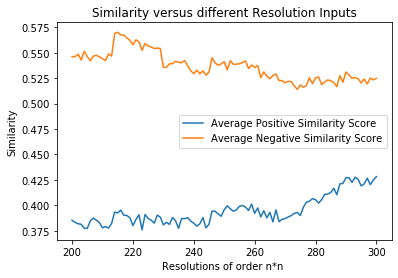

In [71]:
plt.plot(resolutions,Pos_scores_new,label = 'Average Positive Similarity Score')
plt.plot(resolutions,Neg_scores,label = 'Average Negative Similarity Score')
plt.xlabel('Resolutions of order n*n ')
plt.ylabel('Similarity')
plt.title('Similarity versus different Resolution Inputs')
plt.legend()
plt.show()

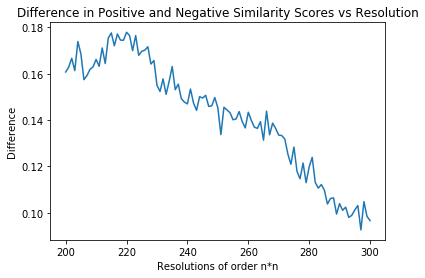

In [77]:
p1 = np.array(Pos_scores_new)
n1 = np.array(Neg_scores)
diff = np.subtract(n1,p1)
plt.plot(resolutions,diff)
plt.xlabel('Resolutions of order n*n')
plt.ylabel('Difference')
plt.title('Difference in Positive and Negative Similarity Scores vs Resolution')
plt.show()

In [95]:
max(diff)


0.17791428824265793